In [128]:
#Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data=pd.read_csv("Electric_Vehicle_Title_and_Registration_Activity.csv")

In [130]:
data.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,State of Residence,Postal Code,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Plug-in Hybrid Electric Vehicle (PHEV),3MW5P9J00M,175488981,2021,BMW,330e,Passenger,20.0,10,Actual Mileage,...,WA,98125.0,False,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303300e+10,46.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),1G1FY6S07L,137066513,2020,CHEVROLET,Bolt EV,Passenger,259.0,10,Actual Mileage,...,WA,98146.0,True,Sale price/value requirement is met,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,34.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
2,Plug-in Hybrid Electric Vehicle (PHEV),JTDKARFP0H,115210994,2017,TOYOTA,Prius Prime,Passenger,25.0,225,Actual Mileage,...,WA,98146.0,True,Sale price/value requirement is met,Not Applicable,Not Applicable,Not Applicable,5.303301e+10,34.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),7SAYGAEE5N,220970333,2022,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,WA,98075.0,False,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),7SAYGDEE5N,192470470,2022,TESLA,Model Y,Passenger,0.0,15,Actual Mileage,...,WA,98033.0,False,The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274289 entries, 0 to 274288
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Clean Alternative Fuel Vehicle Type              274289 non-null  object 
 1   VIN (1-10)                                       274289 non-null  object 
 2   DOL Vehicle ID                                   274289 non-null  int64  
 3   Model Year                                       274289 non-null  int64  
 4   Make                                             274289 non-null  object 
 5   Model                                            274289 non-null  object 
 6   Vehicle Primary Use                              274289 non-null  object 
 7   Electric Range                                   274288 non-null  float64
 8   Odometer Reading                                 274289 non-null  int64  
 9   Odometer Code  

In [132]:
data.drop(['Odometer Code','Legislative District','Electric Utility','Transportation Electrification Fee Paid','Hybrid Vehicle Electrification Fee Paid'],inplace=True,axis=1)

In [133]:
len(data.columns)

24

In [134]:
data.shape

(274289, 24)

In [135]:
data.duplicated().sum()

0

In [136]:
drop_duplicates=data.drop_duplicates()


In [137]:
drop_duplicates.rename(columns = {'Clean Alternative Fuel Vehicle Type':'Vehicle Type','Sale Price':'Sale Price ($)'}, inplace = True) 

In [138]:
drop_duplicates['Vehicle Type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)', 'Hydrogen Powered Vehicle'],
      dtype=object)

In [139]:
drop_duplicates['Model'].unique()

array(['330e', 'Bolt EV', 'Prius Prime', 'Model Y', 'Model S', 'Niro',
       'Leaf', 'Ioniq 5', 'e-tron', 'Model 3', 'Sportage', 'Ioniq',
       'Taycan', 'R1T', 'Soul', 'XC90', 'Wrangler', 'Mustang Mach-E',
       'e-Golf', 'Model X', 'i3', 'S60', 'ID.4', 'EQB-Class', 'GLC-Class',
       'Fusion', 'RAV4 Prime', 'X5', 'Volt', 'Countryman', 'A3', 'F-150',
       'Focus', 'R1S', 'Outlander', 'EQE-Class SUV', 'EV6', 'Bolt EUV',
       'PS2', 'Kona Electric', 'X3', 'Pacifica', 'Cayenne', 'Solterra',
       'RS e-tron GT', 'Q8', '500', 'TONALE', 'Spark', 'Clarity',
       'Escape', 'C-Max', 'Q5 e', 'i8', 'C40', 'Prius Plug-in', 'CX-90',
       'CT6', 'Roadster', 'Ioniq 6', 'Fortwo Electric Drive',
       'Grand Cherokee', 'RAV4', 'Corsair', 'i4', 'Transit', 'iX',
       'Optima', 'Crosstrek', 'Q5', 'ARIYA', 'XC40', 'I-PACE',
       'e-tron Sportback', 'EQE-Class Sedan', 'ELR', 'Lyriq', 'Sorento',
       'Kona', 'EQS-Class SUV', 'Soul EV', 'Hardtop', 'Prius', 'Air',
       'EQS-Class Sedan'

In [140]:
drop_duplicates['Model Year'].unique()

array([2021, 2020, 2017, 2022, 2015, 2019, 2013, 2023, 2018, 2016, 2011,
       2014, 2024, 2012, 2008, 2010, 2000, 1998, 1999, 1993, 2003, 1997],
      dtype=int64)

In [141]:
drop_duplicates['Electric Range'].unique()

array([ 20., 259.,  25.,   0., 208., 239., 151., 204.,  34.,  84.,  29.,
       192.,  93.,  18.,  21., 125., 200., 249.,  72.,  22.,  75.,  10.,
       238.,  32.,  73., 150.,  97.,  83., 291., 215., 337.,  26.,  42.,
        30.,  35.,  53., 322.,  12.,  16., 107.,  17., 220.,  14., 153.,
        76.,  13., 266., 270.,  81.,  87.,  38.,  33.,  82., 265.,  47.,
       289., 210.,  19.,   6.,  31., 149.,  68., 103.,  28., 330.,  23.,
       308.,  39., 234., 218.,  37., 258., 203., 126., 233., 293., 245.,
       170.,  15.,  27.,  58.,  62., 114.,  41., 111., 110.,   8.,  40.,
       222.,  24., 100.,  48.,   9., 124.,  56.,  36.,  11.,  nan,  74.,
        51.,  89.,  59.,  57.,  80.,  95.])

In [142]:
drop_duplicates['Electric Range'].isnull().value_counts()

Electric Range
False    274288
True          1
Name: count, dtype: int64

In [143]:
drop_duplicates.groupby("Vehicle Type")[['Electric Range']].mean().sort_values(by="Electric Range")

,Electric Range
Vehicle Type,
Hydrogen Powered Vehicle,0.000000
Plug-in Hybrid Electric Vehicle (PHEV),31.479772
Battery Electric Vehicle (BEV),86.450328


In [144]:
drop_duplicates[drop_duplicates['Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].isna().value_counts()

Electric Range
False    65677
True         1
Name: count, dtype: int64

In [145]:
#Fill na
range_na=drop_duplicates[drop_duplicates['Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range']

In [146]:
drop_duplicates['Electric Range']=drop_duplicates['Electric Range'].fillna(range_na.mean())

In [147]:
drop_duplicates['Electric Range'].isna().value_counts()

Electric Range
False    274289
Name: count, dtype: int64

In [148]:
drop_duplicates['Electric Range']

0          20.0
1         259.0
2          25.0
3           0.0
4           0.0
          ...  
274284      0.0
274285      0.0
274286      0.0
274287     53.0
274288      0.0
Name: Electric Range, Length: 274289, dtype: float64

In [149]:
drop_duplicates['Vehicle Type'].value_counts()

Vehicle Type
Battery Electric Vehicle (BEV)            208608
Plug-in Hybrid Electric Vehicle (PHEV)     65678
Hydrogen Powered Vehicle                       3
Name: count, dtype: int64

In [150]:
drop_duplicates['Sale Price ($)'].unique()

array([54490, 37415, 35164, ..., 12426, 82886, 61093], dtype=int64)

In [151]:
drop_duplicates['Sale Date'].isna().value_counts()

Sale Date
False    274289
Name: count, dtype: int64

In [152]:
drop_duplicates['Sale Date'] = pd.to_datetime(drop_duplicates['Sale Date'])

In [153]:
drop_duplicates['Sale Date']

0        2021-09-06
1        2020-11-27
2        2017-10-21
3        2022-10-22
4        2022-01-27
            ...    
274284   2023-07-07
274285   2023-07-06
274286   2023-07-21
274287   2023-10-17
274288   2023-06-30
Name: Sale Date, Length: 274289, dtype: datetime64[ns]

In [154]:
drop_duplicates['Transaction Year'].unique()

array([2021, 2020, 2017, 2022, 2023, 2019, 2013, 2015, 2016, 2011, 2024,
       2014, 2018, 2012, 2010], dtype=int64)

In [155]:
drop_duplicates['County'].isna().value_counts()

County
False    274285
True          4
Name: count, dtype: int64

In [156]:
drop_duplicates['County'].fillna("No Info",inplace=True)

In [157]:
drop_duplicates['Base MSRP'].isna().value_counts()

Base MSRP
False    274288
True          1
Name: count, dtype: int64

In [158]:
MSRP_NA=drop_duplicates[drop_duplicates['Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['Base MSRP'].isna().value_counts()

In [159]:
drop_duplicates['Base MSRP']=drop_duplicates['Base MSRP'].fillna(MSRP_NA.mean())

In [160]:
drop_duplicates['Base MSRP'].isna().value_counts()

Base MSRP
False    274289
Name: count, dtype: int64

In [161]:
drop_duplicates['County'].isna().value_counts()

County
False    274289
Name: count, dtype: int64

In [162]:
drop_duplicates['County'].fillna("No Info",inplace=True)

In [163]:
drop_duplicates['City'].fillna("No Info",inplace=True)

In [164]:
drop_duplicates['State of Residence'].fillna("No Info",inplace=True)

In [165]:
drop_duplicates['Postal Code'].fillna("No Info",inplace=True)

In [166]:
drop_duplicates['Meets 2019 HB 2042 Sale Price/Value Requirement'].unique()


array([False,  True])

In [167]:
drop_duplicates['2019 HB 2042: Sale Price/Value Requirement'].unique()

array(['The sale price is too high',
       'Sale price/value requirement is met',
       'This transaction type is not eligible for the tax exemption',
       'The sale price is not available', 'The vehicle value is too high'],
      dtype=object)

In [168]:
drop_duplicates['Electric Vehicle Fee Paid'].unique()

array(['Not Applicable', 'No', 'Yes'], dtype=object)

In [169]:
drop_duplicates['2020 Census Tract'].unique()

array([5.30330022e+10, 5.30330121e+10, 5.30330322e+10, ...,
       4.10079513e+10, 4.10670308e+10, 4.01342251e+09])

In [170]:
drop_duplicates['2020 Census Tract'].isna().value_counts()

2020 Census Tract
False    274285
True          4
Name: count, dtype: int64

In [171]:
drop_duplicates[drop_duplicates['Vehicle Type']=='Battery Electric Vehicle (BEV)']['2020 Census Tract'].isna().value_counts()

2020 Census Tract
False    208605
True          3
Name: count, dtype: int64

In [172]:
drop_duplicates[drop_duplicates['Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['2020 Census Tract'].isna().value_counts()

2020 Census Tract
False    65677
True         1
Name: count, dtype: int64

In [173]:
drop_duplicates.groupby("Vehicle Type")[['2020 Census Tract']].mean().sort_values(by="2020 Census Tract")

,2020 Census Tract
Vehicle Type,
Plug-in Hybrid Electric Vehicle (PHEV),5.296789e+10
Battery Electric Vehicle (BEV),5.299837e+10
Hydrogen Powered Vehicle,5.304639e+10


In [174]:
Tract_fill=drop_duplicates[drop_duplicates['Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['2020 Census Tract']

In [175]:
drop_duplicates['2020 Census Tract']=drop_duplicates['2020 Census Tract'].fillna(Tract_fill.mean())

In [176]:
drop_duplicates['2020 Census Tract'].isna().value_counts()

2020 Census Tract
False    274289
Name: count, dtype: int64

In [177]:
drop_duplicates

,Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,New or Used Vehicle,...,DOL Transaction Date,Transaction Year,County,City,State of Residence,Postal Code,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,2020 Census Tract
0,Plug-in Hybrid Electric Vehicle (PHEV),3MW5P9J00M,175488981,2021,BMW,330e,Passenger,20.0,10,New,...,October 01 2021,2021,King,SEATTLE,WA,98125.0,False,The sale price is too high,Not Applicable,5.303300e+10
1,Battery Electric Vehicle (BEV),1G1FY6S07L,137066513,2020,CHEVROLET,Bolt EV,Passenger,259.0,10,New,...,December 30 2020,2020,King,SEATTLE,WA,98146.0,True,Sale price/value requirement is met,Not Applicable,5.303301e+10
2,Plug-in Hybrid Electric Vehicle (PHEV),JTDKARFP0H,115210994,2017,TOYOTA,Prius Prime,Passenger,25.0,225,New,...,November 15 2017,2017,King,SEATTLE,WA,98146.0,True,Sale price/value requirement is met,Not Applicable,5.303301e+10
3,Battery Electric Vehicle (BEV),7SAYGAEE5N,220970333,2022,TESLA,Model Y,Passenger,0.0,15,New,...,November 17 2022,2022,King,SAMMAMISH,WA,98075.0,False,The sale price is too high,Not Applicable,5.303303e+10
4,Battery Electric Vehicle (BEV),7SAYGDEE5N,192470470,2022,TESLA,Model Y,Passenger,0.0,15,New,...,February 18 2022,2022,King,KIRKLAND,WA,98033.0,False,The sale price is too high,Not Applicable,5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274284,Battery Electric Vehicle (BEV),JTMABABA2P,249931475,2023,SUBARU,Solterra,Passenger,0.0,5,New,...,July 13 2023,2023,King,TUKWILA,WA,98188.0,True,Sale price/value requirement is met,Not Applicable,5.303303e+10
274285,Battery Electric Vehicle (BEV),JTMABABA0P,250003155,2023,SUBARU,Solterra,Passenger,0.0,5,New,...,July 13 2023,2023,King,TUKWILA,WA,98188.0,True,Sale price/value requirement is met,Not Applicable,5.303303e+10
274286,Battery Electric Vehicle (BEV),7SAYGDEE7P,249975351,2023,TESLA,Model Y,Passenger,0.0,15,New,...,August 17 2023,2023,King,AUBURN,WA,98001.0,False,The sale price is too high,Not Applicable,5.303303e+10
274287,Plug-in Hybrid Electric Vehicle (PHEV),1G1RD6S50H,158945265,2017,CHEVROLET,Volt,Passenger,53.0,61902,Used,...,November 09 2023,2023,Okanogan,WINTHROP,WA,98862.0,True,Sale price/value requirement is met,Not Applicable,5.304797e+10


In [178]:
drop_duplicates.shape

(274289, 24)

In [179]:
drop_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274289 entries, 0 to 274288
Data columns (total 24 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Vehicle Type                                     274289 non-null  object        
 1   VIN (1-10)                                       274289 non-null  object        
 2   DOL Vehicle ID                                   274289 non-null  int64         
 3   Model Year                                       274289 non-null  int64         
 4   Make                                             274289 non-null  object        
 5   Model                                            274289 non-null  object        
 6   Vehicle Primary Use                              274289 non-null  object        
 7   Electric Range                                   274289 non-null  float64       
 8   Odometer Reading        

In [180]:
#drop_duplicates.to_csv('Vehicle_Registration_Activity.csv')

**No of Electrics Vehicles by Vehicle Type**

In [181]:
drop_duplicates.groupby(['Vehicle Type'])['Model'].count().reset_index(name='no.of.electric_vehicles')

,Vehicle Type,no.of.electric_vehicles
0,Battery Electric Vehicle (BEV),208608
1,Hydrogen Powered Vehicle,3
2,Plug-in Hybrid Electric Vehicle (PHEV),65678


**Top 10 EV Model With Highest Range**

In [182]:
drop_duplicates.groupby('Model')['Electric Range'].max().sort_values(ascending=False).head(10)

Model
Model S     337.0
Model 3     322.0
Model X     293.0
Model Y     291.0
Bolt EV     259.0
Kona        258.0
Roadster    245.0
Niro        239.0
I-PACE      234.0
PS2         233.0
Name: Electric Range, dtype: float64

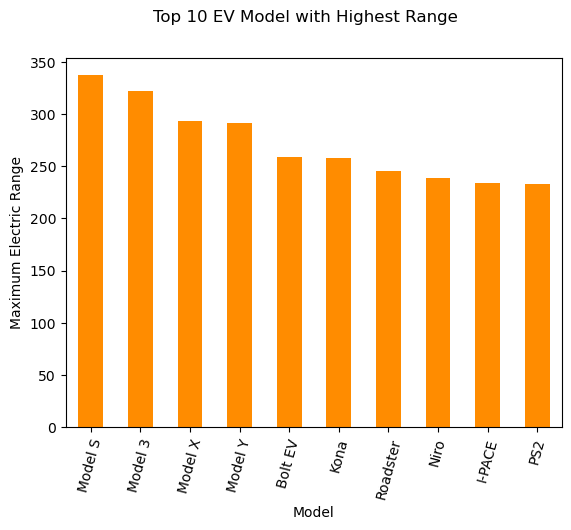

In [183]:
drop_duplicates.groupby('Model')['Electric Range'].max().sort_values(ascending=False).head(10).plot(kind='bar',color="darkorange")
plt.ylabel('Maximum Electric Range')
plt.xticks(rotation=75)
plt.suptitle('Top 10 EV Model with Highest Range')
plt.show()

**Electrical Vehicles of which company are the most popular?**

In [184]:
popular_company = drop_duplicates.groupby(["Make"])['County'].count()
popular_company = popular_company.reset_index()
popular_company = popular_company.rename(columns = {"Make":"Company", "County":"Total number of vehicles"})
popular_company = popular_company.sort_values(by = "Total number of vehicles",ascending=False)


In [185]:
popular_company

,Company,Total number of vehicles
35,TESLA,103481
28,NISSAN,47491
7,CHEVROLET,24715
12,FORD,17322
4,BMW,13536
19,KIA,10547
37,TOYOTA,8760
38,VOLKSWAGEN,6195
39,VOLVO,5160
1,AUDI,5012


**Tesla is a Most Popular Country**

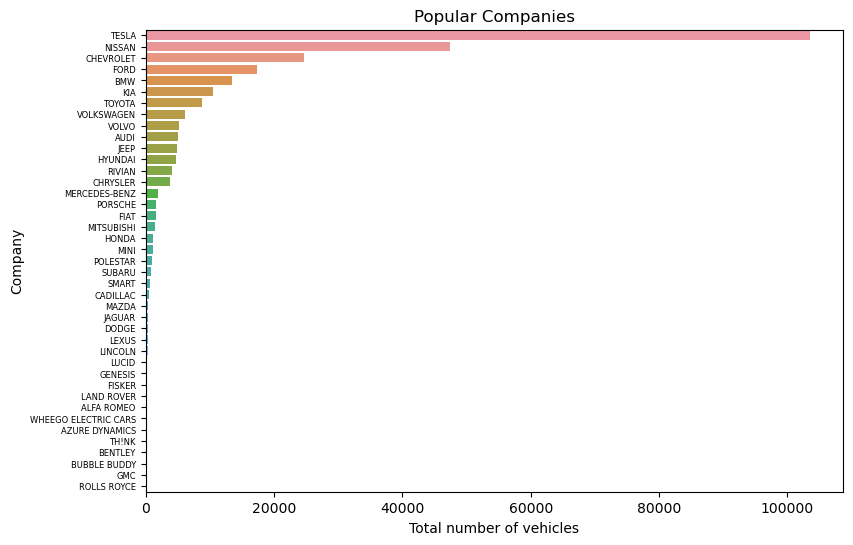

In [186]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x = popular_company["Total number of vehicles"], y = popular_company["Company"])
plt.yticks(fontsize=6)
plt.title('Popular Companies')
plt.show()

**Total Number of Vehicles Of AUDI**

In [187]:
popular_company[popular_company['Company']=='AUDI']

,Company,Total number of vehicles
1,AUDI,5012


**Number of EV's Registed by Model Year**

In [188]:
model_year_counts = drop_duplicates['Model Year'].value_counts().sort_index()
model_year_counts

Model Year
1993        1
1997        1
1998        2
1999        5
2000       24
2003        2
2008       26
2010       94
2011     4182
2012     8119
2013    20879
2014    12702
2015    17152
2016    16931
2017    17483
2018    22742
2019    17418
2020    17122
2021    24255
2022    32548
2023    57544
2024     5057
Name: count, dtype: int64

C:\Users\Neha Koli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


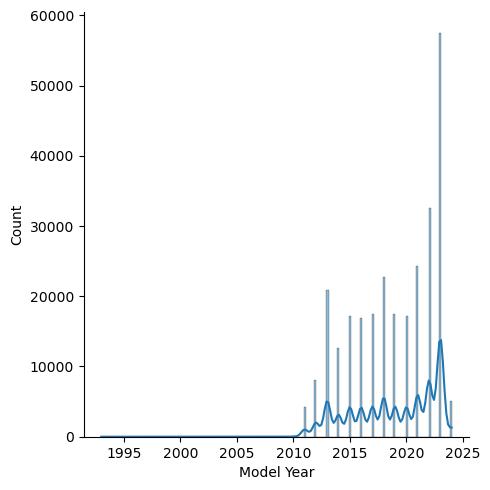

In [189]:
sns.displot(drop_duplicates['Model Year'],kde=True)

In [190]:
model_year_counts.index

Index([1993, 1997, 1998, 1999, 2000, 2003, 2008, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='Model Year')

In [191]:
model_year_counts.values

array([    1,     1,     2,     5,    24,     2,    26,    94,  4182,
        8119, 20879, 12702, 17152, 16931, 17483, 22742, 17418, 17122,
       24255, 32548, 57544,  5057], dtype=int64)

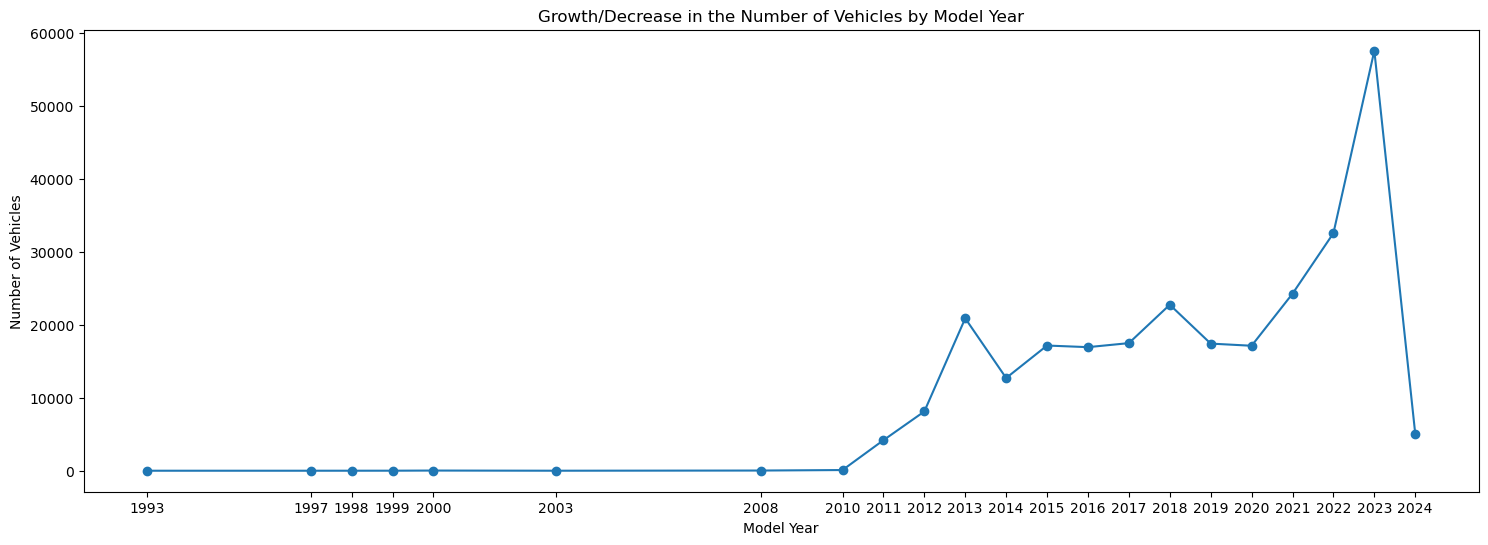

In [192]:
# growth or decrease in the number of vehicles by Model Year
plt.figure(figsize=(18, 6))
plt.plot(model_year_counts.index, model_year_counts.values, marker='o', linestyle='-')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Growth/Decrease in the Number of Vehicles by Model Year')

plt.xticks(model_year_counts.index)
plt.show()

**Top 15 Car Makers**

In [193]:
makers = drop_duplicates['Make'].value_counts()

# Get the top 15 makers
top_15 = makers.head(15)
top_15

Make
TESLA            103481
NISSAN            47491
CHEVROLET         24715
FORD              17322
BMW               13536
KIA               10547
TOYOTA             8760
VOLKSWAGEN         6195
VOLVO              5160
AUDI               5012
JEEP               4877
HYUNDAI            4787
RIVIAN             4111
CHRYSLER           3747
MERCEDES-BENZ      1885
Name: count, dtype: int64

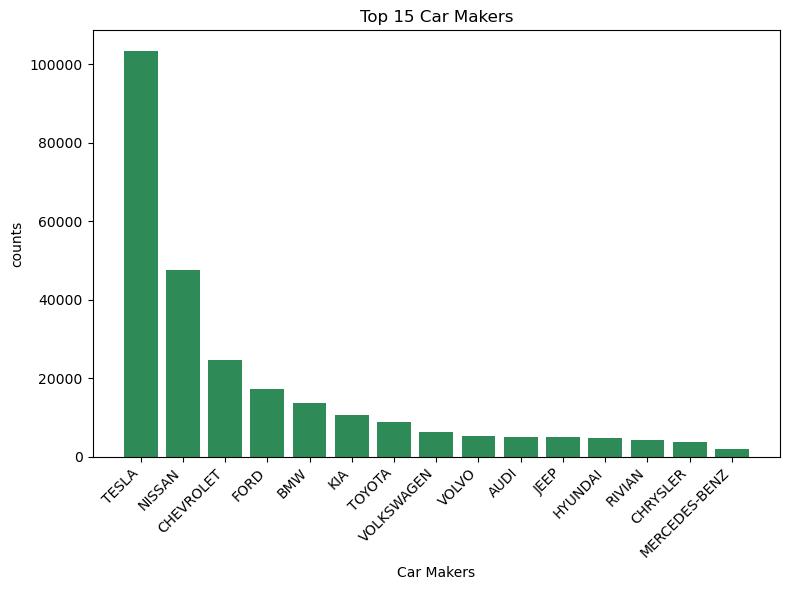

In [194]:
plt.figure(figsize=(8, 6))
plt.bar(top_15.index.astype(str), top_15.values, color='seagreen')
plt.xlabel('Car Makers')
plt.ylabel('counts')
plt.title('Top 15 Car Makers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Car Makers with Average EV range**

In [195]:
electric_range = drop_duplicates.groupby(['Make'])['Electric Range'].mean().sort_values(ascending=False)

# Get the top 15 makers
model = electric_range.head(10)
model

Make
JAGUAR                  209.400000
TESLA                   103.005015
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                87.876229
FIAT                     85.934545
NISSAN                   83.709777
SMART                    62.314642
KIA                      59.760595
AUDI                     56.813647
Name: Electric Range, dtype: float64

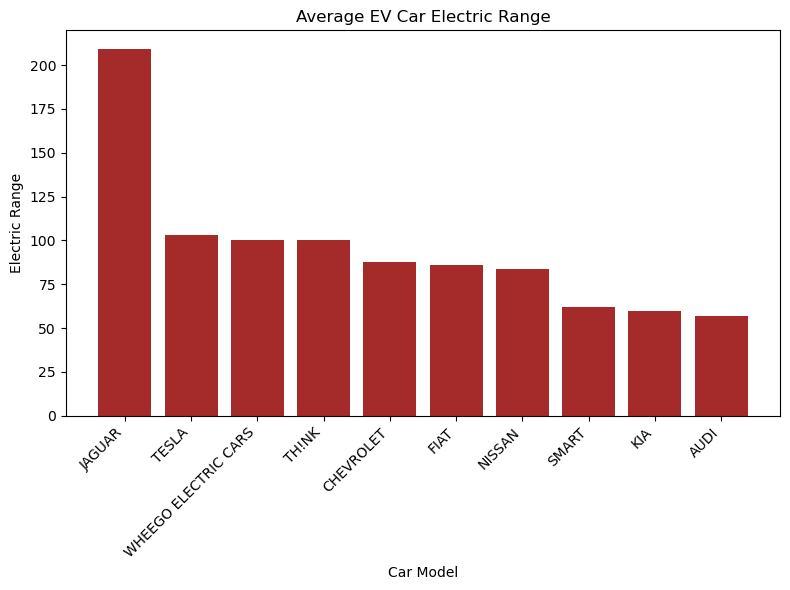

In [196]:
plt.figure(figsize=(8, 6))
plt.bar(model.index.astype(str), model.values, color='brown')
plt.xlabel('Car Model')
plt.ylabel('Electric Range')
plt.title('Average EV Car Electric Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Models of which years are the most popular?**

In [197]:
counting_year = drop_duplicates.groupby(["Model Year",  "Vehicle Type"])['County'].count()
counting_year = counting_year.to_frame().reset_index()
counting_year = counting_year.rename(columns = {"Model Year":"Model Year", "County":"Total number of vehicles"})
counting_year = counting_year.sort_values(by = "Total number of vehicles")

In [198]:
counting_year

,Model Year,Vehicle Type,Total number of vehicles
0,1993,Battery Electric Vehicle (BEV),1
1,1997,Battery Electric Vehicle (BEV),1
21,2016,Hydrogen Powered Vehicle,1
2,1998,Battery Electric Vehicle (BEV),2
5,2003,Battery Electric Vehicle (BEV),2
18,2015,Hydrogen Powered Vehicle,2
3,1999,Battery Electric Vehicle (BEV),5
8,2010,Plug-in Hybrid Electric Vehicle (PHEV),15
4,2000,Battery Electric Vehicle (BEV),24
6,2008,Battery Electric Vehicle (BEV),26


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1993'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2003'),
  Text(6, 0, '2008'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018'),
  Text(16, 0, '2019'),
  Text(17, 0, '2020'),
  Text(18, 0, '2021'),
  Text(19, 0, '2022'),
  Text(20, 0, '2023'),
  Text(21, 0, '2024')])

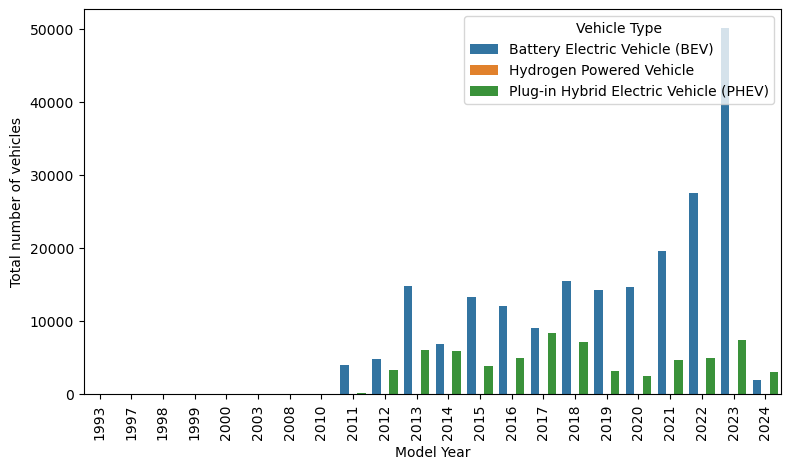

In [199]:
fig = plt.subplots(figsize =(9, 5))

sns.barplot(data=counting_year, x="Model Year", y="Total number of vehicles", hue="Vehicle Type")
plt.xticks(rotation = 90)

**Top 5 Sale Prices of BEV**

In [200]:
BEV_TOP_5=drop_duplicates[drop_duplicates["Vehicle Type"]=='Battery Electric Vehicle (BEV)'].groupby(['Make'])['Sale Price ($)'].max().sort_values(ascending=False).head(5)

In [201]:
BEV_TOP_5

Make
NISSAN    12312016
BMW       12292023
TESLA     11032022
FIAT        940325
AUDI        864713
Name: Sale Price ($), dtype: int64

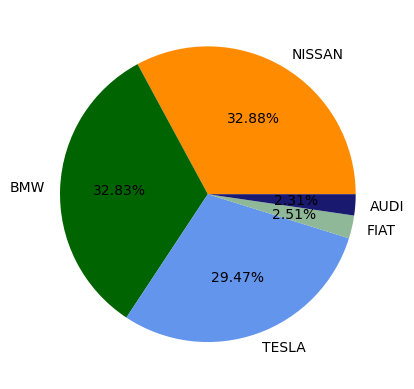

In [202]:
colors = ['darkorange', 'darkgreen', 'cornflowerblue', '#8EB897','midnightblue']
BEV_TOP_5_fig=plt.pie(BEV_TOP_5,autopct='%1.2f%%', labels=BEV_TOP_5.index,colors=colors)

**Top 5 Sale Prices of BEV**

In [203]:

PHEV_TOP_5=drop_duplicates[drop_duplicates["Vehicle Type"]=='Plug-in Hybrid Electric Vehicle (PHEV)'].groupby(['Make'])['Sale Price ($)'].max().sort_values(ascending=False).head(5)

In [204]:
PHEV_TOP_5

Make
PORSCHE     1500000
JEEP         779995
VOLVO        541250
MAZDA        528065
CADILLAC     499956
Name: Sale Price ($), dtype: int64

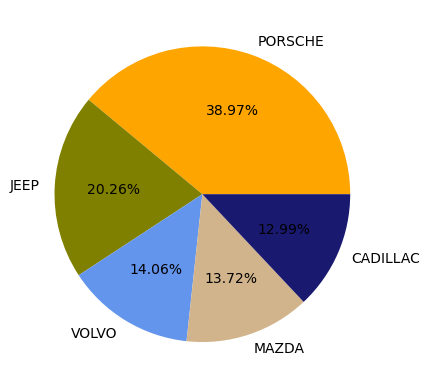

In [205]:
colors1 = ['orange', 'olive', 'cornflowerblue', 'tan','midnightblue']
PHEV_TOP_5_fig=plt.pie(PHEV_TOP_5,autopct='%1.2f%%', labels=PHEV_TOP_5.index,colors=colors1)

**Primary use of Most BEV Vehicles**

In [206]:
Primary_use_BEV = drop_duplicates[drop_duplicates["Vehicle Type"]=='Battery Electric Vehicle (BEV)'].groupby(["Vehicle Type","Vehicle Primary Use"])['County'].count()
Primary_use_BEV = Primary_use_BEV.to_frame().reset_index()
Primary_use_BEV = Primary_use_BEV.rename(columns = {"County":"Total number of vehicles","Vehicle Primary Use":"Primary Use"})
Primary_use_BEV = Primary_use_BEV.sort_values(by = "Total number of vehicles")

In [207]:
Primary_use_BEV.reset_index()

,index,Vehicle Type,Primary Use,Total number of vehicles
0,4,Battery Electric Vehicle (BEV),Farm Use,1
1,3,Battery Electric Vehicle (BEV),Farm Exempt,3
2,0,Battery Electric Vehicle (BEV),Cab,4
3,7,Battery Electric Vehicle (BEV),Neighborhood Electric Vehicle,7
4,6,Battery Electric Vehicle (BEV),Medium-Speed Electric Vehicle,19
5,5,Battery Electric Vehicle (BEV),For Hire,44
6,1,Battery Electric Vehicle (BEV),Commercial,1259
7,2,Battery Electric Vehicle (BEV),Exempt (State/County/Local/Tribal),2075
8,9,Battery Electric Vehicle (BEV),Truck,2891
9,8,Battery Electric Vehicle (BEV),Passenger,202305


**Primary use of Most PHEV Vehicles**

In [208]:
Primary_use_PHEV = drop_duplicates[drop_duplicates["Vehicle Type"]=='Plug-in Hybrid Electric Vehicle (PHEV)'].groupby(["Vehicle Type","Vehicle Primary Use"])['County'].count()
Primary_use_PHEV = Primary_use_PHEV.to_frame().reset_index()
Primary_use_PHEV = Primary_use_PHEV.rename(columns = {"County":"Total number of vehicles","Vehicle Primary Use":"Primary Use"})
Primary_use_PHEV = Primary_use_PHEV.sort_values(by = "Total number of vehicles")

In [209]:
Primary_use_PHEV

,Vehicle Type,Primary Use,Total number of vehicles
7,Plug-in Hybrid Electric Vehicle (PHEV),Private School,1
0,Plug-in Hybrid Electric Vehicle (PHEV),Cab,2
8,Plug-in Hybrid Electric Vehicle (PHEV),Taxi Cab,2
5,Plug-in Hybrid Electric Vehicle (PHEV),Neighborhood Electric Vehicle,4
9,Plug-in Hybrid Electric Vehicle (PHEV),Truck,5
4,Plug-in Hybrid Electric Vehicle (PHEV),Medium-Speed Electric Vehicle,13
3,Plug-in Hybrid Electric Vehicle (PHEV),For Hire,30
1,Plug-in Hybrid Electric Vehicle (PHEV),Commercial,102
2,Plug-in Hybrid Electric Vehicle (PHEV),Exempt (State/County/Local/Tribal),732
6,Plug-in Hybrid Electric Vehicle (PHEV),Passenger,64787


**Average Sale Prices**

In [210]:
Sale_price=drop_duplicates.groupby(['Make'])['Sale Price ($)'].mean().sort_values(ascending=False)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5356\3668581678.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Sale_price, shade=True)


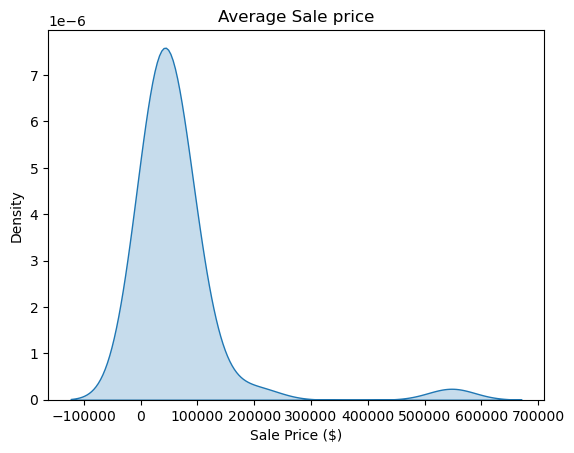

In [211]:
sns.kdeplot(Sale_price, shade=True)
plt.title("Average Sale price")
plt.show()

In [212]:
drop_duplicates.columns

Index(['Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID', 'Model Year', 'Make',
       'Model', 'Vehicle Primary Use', 'Electric Range', 'Odometer Reading',
       'New or Used Vehicle', 'Sale Price ($)', 'Sale Date', 'Base MSRP',
       'Transaction Type', 'DOL Transaction Date', 'Transaction Year',
       'County', 'City', 'State of Residence', 'Postal Code',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', '2020 Census Tract'],
      dtype='object')

**Logistic Regression**

<Axes: >

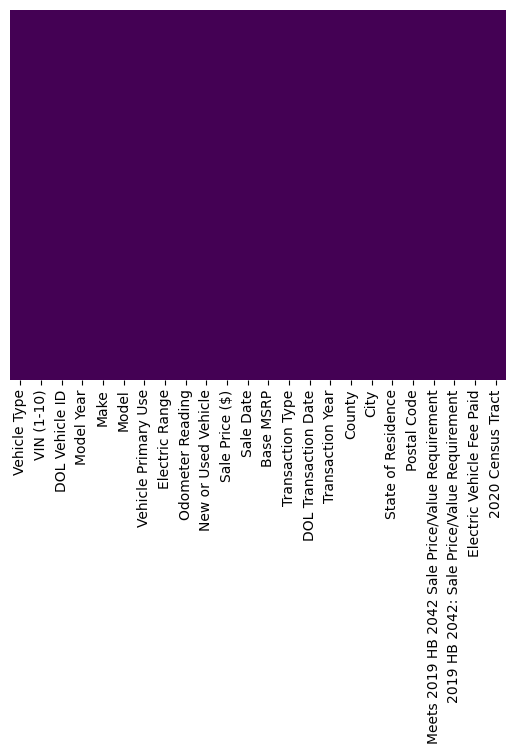

In [213]:
sns.heatmap(drop_duplicates.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [214]:
drop_duplicates.columns

Index(['Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID', 'Model Year', 'Make',
       'Model', 'Vehicle Primary Use', 'Electric Range', 'Odometer Reading',
       'New or Used Vehicle', 'Sale Price ($)', 'Sale Date', 'Base MSRP',
       'Transaction Type', 'DOL Transaction Date', 'Transaction Year',
       'County', 'City', 'State of Residence', 'Postal Code',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', '2020 Census Tract'],
      dtype='object')

In [215]:
x = drop_duplicates[['Vehicle Type','Odometer Reading','Electric Range','Base MSRP']] #Independent
y = drop_duplicates['New or Used Vehicle'] # dependent

In [216]:
x

,Vehicle Type,Odometer Reading,Electric Range,Base MSRP
0,Plug-in Hybrid Electric Vehicle (PHEV),10,20.0,0.0
1,Battery Electric Vehicle (BEV),10,259.0,0.0
2,Plug-in Hybrid Electric Vehicle (PHEV),225,25.0,0.0
3,Battery Electric Vehicle (BEV),15,0.0,0.0
4,Battery Electric Vehicle (BEV),15,0.0,0.0
...,...,...,...,...
274284,Battery Electric Vehicle (BEV),5,0.0,0.0
274285,Battery Electric Vehicle (BEV),5,0.0,0.0
274286,Battery Electric Vehicle (BEV),15,0.0,0.0
274287,Plug-in Hybrid Electric Vehicle (PHEV),61902,53.0,0.0


In [217]:
from sklearn.preprocessing import LabelEncoder

In [218]:
le = LabelEncoder()

In [219]:
x.columns

Index(['Vehicle Type', 'Odometer Reading', 'Electric Range', 'Base MSRP'], dtype='object')

In [220]:
catcol = x.select_dtypes(object)

In [245]:
for item in catcol:
    x[item] = le.fit_transform(x[item])

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5356\155704800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[item] = le.fit_transform(x[item])


In [223]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274289 entries, 0 to 274288
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Vehicle Type      274289 non-null  int32  
 1   Odometer Reading  274289 non-null  int64  
 2   Electric Range    274289 non-null  float64
 3   Base MSRP         274289 non-null  float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 7.3 MB


In [224]:
y

0          New
1          New
2          New
3          New
4          New
          ... 
274284     New
274285     New
274286     New
274287    Used
274288     New
Name: New or Used Vehicle, Length: 274289, dtype: object

In [225]:
from sklearn.model_selection import train_test_split

In [241]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
logreg = LogisticRegression()

In [229]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [230]:
xtest

,Vehicle Type,Odometer Reading,Electric Range,Base MSRP
26290,0,5,0.0,0.0
71916,0,25125,84.0,0.0
86740,0,6,150.0,0.0
190796,0,34052,200.0,0.0
129096,0,11,0.0,0.0
...,...,...,...,...
14630,0,15,291.0,0.0
65637,0,50,200.0,0.0
30059,2,5,25.0,0.0
26784,0,50,208.0,69900.0


In [231]:
ypred = logreg.predict(xtest)

In [232]:
ypred

array(['New', 'Used', 'New', ..., 'New', 'New', 'New'], dtype=object)

In [233]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [234]:
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
print(f'Accuracy Score {ac}')
print(f'Confusion Matrix is {cm}')

Accuracy Score 0.9804343334913169
Confusion Matrix is [[57690   230]
 [ 1380 22987]]


In [235]:
train_score = logreg.score(xtrain,ytrain)
test_score = logreg.score(xtest,ytest)
print(f'Training Score is {train_score}')
print(f'Test Score is {test_score}')

Training Score is 0.9798231268424287
Test Score is 0.9804343334913169


In [236]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [237]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [238]:
ypred = logreg.predict(xtest)

In [239]:
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
print(f'Accuracy Score {ac}')
print(f'Confusion Matrix is {cm}')
train_score = logreg.score(xtrain,ytrain)
test_score = logreg.score(xtest,ytest)
print(f'Training Score is {train_score}')
print(f'Test Score is {test_score}')

Accuracy Score 0.9797416359813822
Confusion Matrix is [[57760   209]
 [ 1458 22860]]
Training Score is 0.9797085447026593
Test Score is 0.9797416359813822


**Classification Report**

In [240]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         New       0.98      1.00      0.99     57969
        Used       0.99      0.94      0.96     24318

    accuracy                           0.98     82287
   macro avg       0.98      0.97      0.98     82287
weighted avg       0.98      0.98      0.98     82287

